HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:
# IMPORTS/CONSTANTS FOR EXPERIMENT

from main import *  # Must be reimported when changes made to module file

filename = "TCB2_data_HPLC.csv"  # TCB2 #using current working directory plus file name
HT_filename = "TCB2_data_HT.csv"


# possible outlier tests  = ['grubbs', 'ROUT']  #JJB chece if grubbs is itterative and what limit set 
# possible post hoc = [ 'pLSD' , 'tukey' ]


# treatment_mapping = (
#     {  # TO DO : change name to treatment_info and add columns in df REMI
#         1: {"treatment": "vehicles",
#             "color": "white",
#             "experiments": ["dose_response", "agonist_antagonist"],
#             },
#         2: {"treatment": "0.3mg/kgTCB",
#             "color": "salmon",
#             "experiments": ["dose_response"],
#             },
#         3: {"treatment": "3mg/kgTCB",
#             "color": "red",
#             "experiments": ["dose_response", "agonist_antagonist"],
#             },
#         4: {"treatment": "10mg/kgTCB",
#             "color": "firebrick",
#             "experiments": ["dose_response"],
#             },
#         5: {"treatment": "0.2mg/kgMDL",
#             "color": "grey",
#             "experiments": ["agonist_antagonist"],
#             },
#         6: {"treatment": "TCB+MDL",
#             "color": "black",
#             "experiments": ["agonist_antagonist"],
#             },
#     }
# )
# compound_ratio_mapping = { 
#     "DOPAC": ["DA"],
#     "5HIAA": ["5HT"],
#     "3MT": ["DA"],
#     "HVA": ["DA", "3MT", "DOPAC"],
#     "GLN": ["GLU"],
# }
# region_subclassification = {
#     'cortex': {'regions': ['OF', 'PL', 'CC', 'IC', 'M', 'SL1', 'SR1', 'AC', 'V'], 'color': 'mediumblue'}, #SR6, SL6 ?
#     'subcortical_telencephalon': {'regions': ['Am', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL'], 'color': 'orange'},
#     'diencephalon': {'regions': ['MD', 'VPL', 'VPR', 'DG', 'Y'], 'color': 'darkorchid'},
#     'mesencephalon': {'regions': ['SC', 'SN', 'VTA', 'DR', 'MR'], 'color': 'forestgreen'},
#     'cerebellum': {'regions': ['CE'], 'color': 'peru'}
# }
# compound_subclassification = {
#     'monoamines':['LDOPA', 'NA', 'A', '5HTP', 'DOPAC', 'DA', '5HIAA', 'HVA', '5HT', 'VMA', '3MT'],
#     'amino_acids':['ASP', 'GLU', 'ASPN', 'HIS', 'LSER', 'GLN', 'ARG', 'GLY', 'THR', 'TAU', 'ALA', 'TYR', 'GABA'],
#     'neurotransmitters':['DA','NA','5HT','GLU','GABA','ASP','GLY']
# }





# # JJB : this is how I believe it should be, your code relies on quantitative_statistics and correlation_statistics this should be removed
# experimental_info = {
#     "dose_response": {"groups": [1, 2, 3, 4], 
#                       "independant_vars": ["TCB2"], 
#                       "paired": False,
#                       "parametric": True, #idealy this would be True / False / Check : check would involve checking the data using the spearman test which should already be done then taking the majority of the data to be parametric or not chose that 
#                       "outliers": 'grubbs'
#                       },


#     "agonist_antagonist": {"groups": [1,3,5,6,],  
#                          "independant_vars": ["TCB2","MDL"],
#                          "paired": False,
#                          "parametric": True,
#                          "outliers": "grubbs"
#                            },
# }


# saveMetadata(
#     filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
# )

# saveMetadata(
#     HT_filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
# )




In [2]:
#CONSTRUCTION

# pca(filename)

# pca(filename, 
#     experiment='dose_response',
#     compounds=['DOPAC','5HIAA'], 
#     regions=["OF","PL","CC","IC","M", "SJ","SL1","SR1"], 
#     from_scratch=True,
#     threshold_vairance = 0.1)

#5HIAA/5HT no working with all BRs
#any single val issue IndexError: list index out of range
#all BRs ValueError: Shape of passed values is (39, 39), indices imply (39, 60)

justStats(filename, 
          experiments=['dose_response'], 
          compounds=['5HIAA/5HT'], 
          regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], 
        p_value_threshold=0.05)

#issues
#duplicating rows not updating them
#saving tukey when only need higher stats

subselectDf(getQuantitativeStats(filename), {'experiment':'dose_response', 
                                            #  'is_significant':True, 
                                             'compound':'5HIAA/5HT', 
                                             'test':'one_way_anova',
                                             'region':["VPR"]})


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Calculating stats for dose_response, 5HIAA/5HT, OF
Index(['mouse_id', 'group_id', 'value', 'compound', 'region', 'treatment',
       'color', 'experiment', 'grubbs_outlier', 'eliminated_grubbs_outlier'],
      dtype='object')

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  37.538512  2.577968e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -0.5226  0.0000 -0.7014 -0.3438    True
1  0.3mg/kgTCB   3mg/kgTCB   -0.3628  0.0000 -0.5416 -0.1840    True
2  0.3mg/kgTCB    vehicles    0.0623  0.7958 -0.1205  0.2451   False
3   10mg/kgTCB   3mg/kgTCB    0.1598  0.0711 -0.0099  0.3294   False
4   10mg/kgTCB    vehicles    0.5849  0.0000  0.4111  0.7588    True
5    3mg/kgTCB    vehicles    0.4251  0.0000  0.2513  0.5990    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/qu

,data_type,experiment,region,compound,test,p_value_threshold,is_significant,p_value,result
0,HPLC,dose_response,VPR,5HIAA/5HT,one_way_anova,0.05,True,0.000003,F p_value 0 13.904092 0.000003


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Invalid characters in identifier, replacing with '_' 
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
please make code for PLOTTING SIGNIFICANCE as in hist func
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _

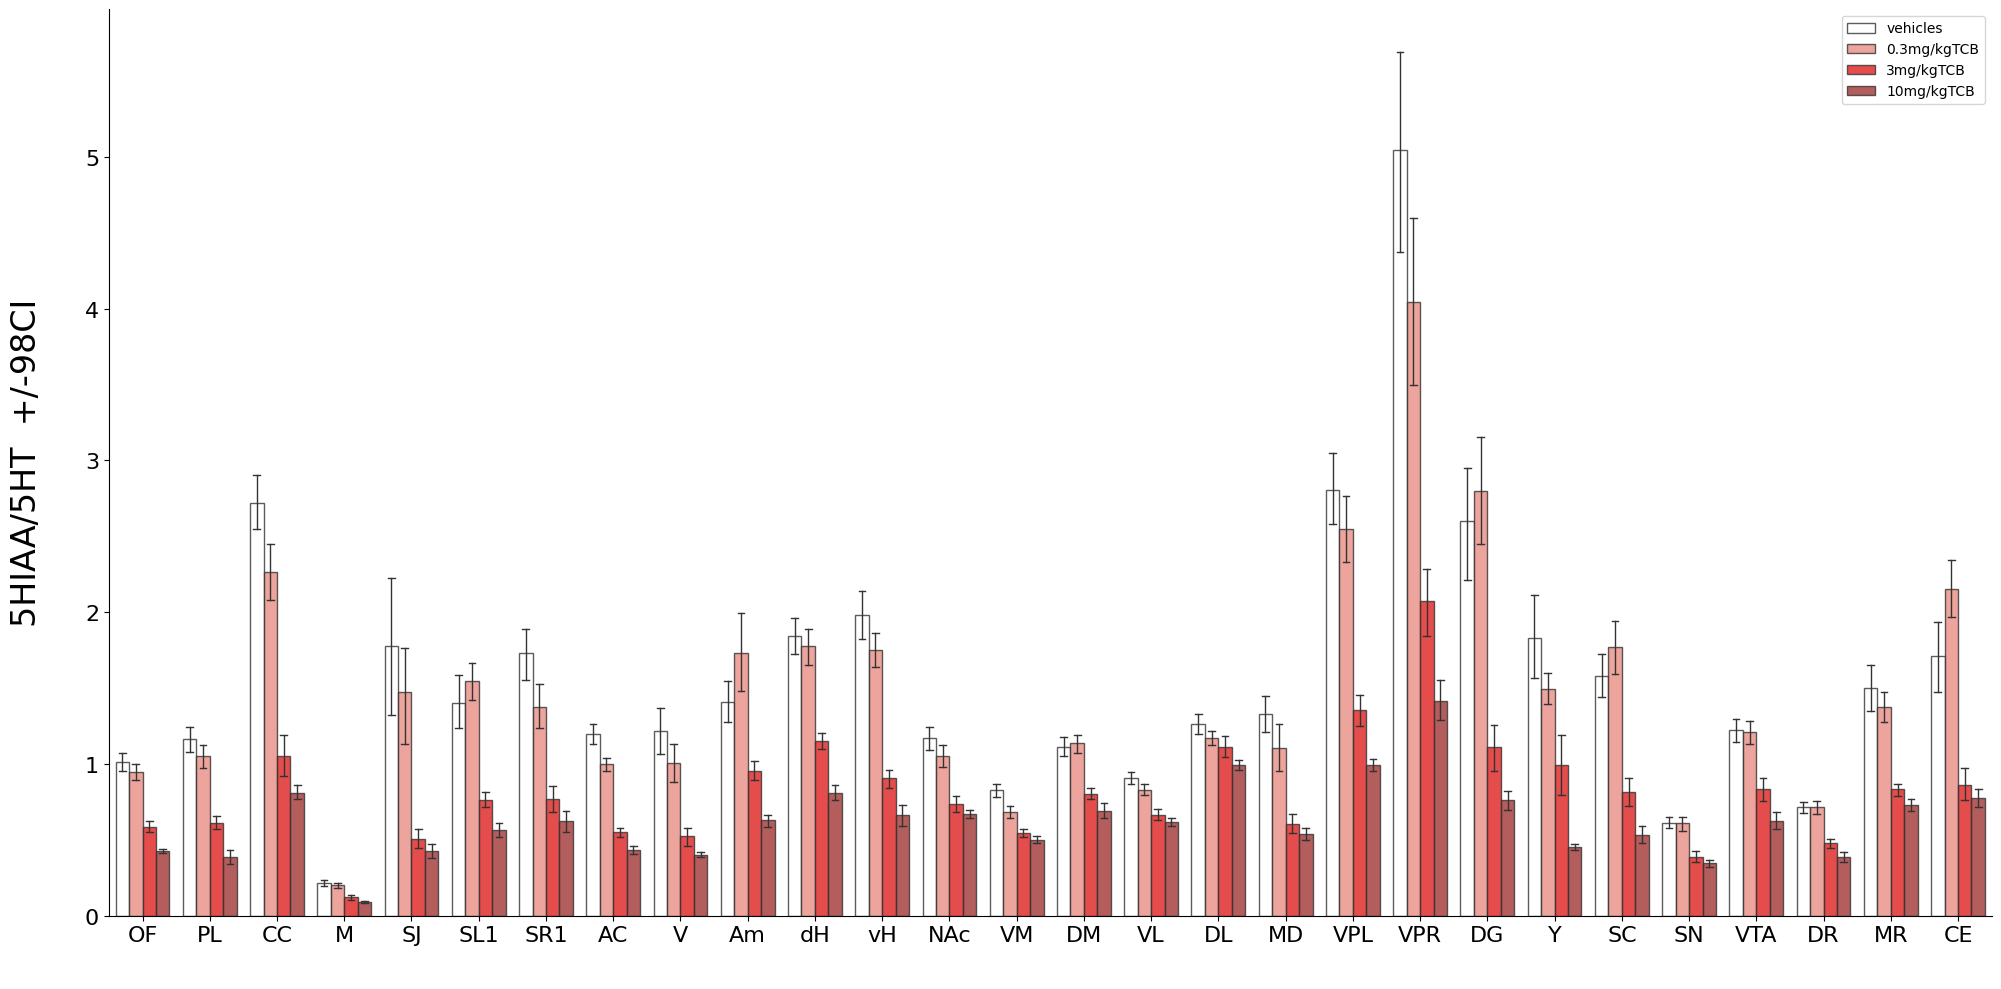

In [2]:
# quantitativeSummary(
#         filename,
#         experiment='dose_response',
#         histogram_type='compound', #chose a single compound or region
#         to_plot=['DA'], #chose a list of regions or compounds (x-axis of hist)
#         p_value_threshold=0.05,
#         columns=['DM','VM','DL','VL'],
#         from_scratch=True )

# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE

# quantitativeSummary(filename)

quantitativeSummary(
     filename,
    experiment='dose_response',
    histogram_type='compound',  #  compound or region
    to_plot='5HIAA/5HT',  # chosen compound or region 
    p_value_threshold=0.05,
    columns=["OF","PL","CC", "M", "SJ","SL1",  "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], # x values to plot 
    from_scratch=True,
)

# quantitativeSummary(
#      filename,
#     experiment='agonist_antagonist',
#     histogram_type='compound',  #  compound or region
#     to_plot='3MT/DA',  # chosen compound or region 
#     p_value_threshold=0.05,
#     columns=[ "NAc", "VM", "DM","VL", "DL"], # x values to plot 
#     from_scratch=True,
# )
#JJB fix need to run juststats for the regions before otherwise cvant fetch stats df


Invalid characters in identifier, replacing with '_' 
RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


/Users/jasminebutler/Desktop/phd/module/quantitative.py:512: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/percentage_vehicles/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/percentage_vehicles/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].png


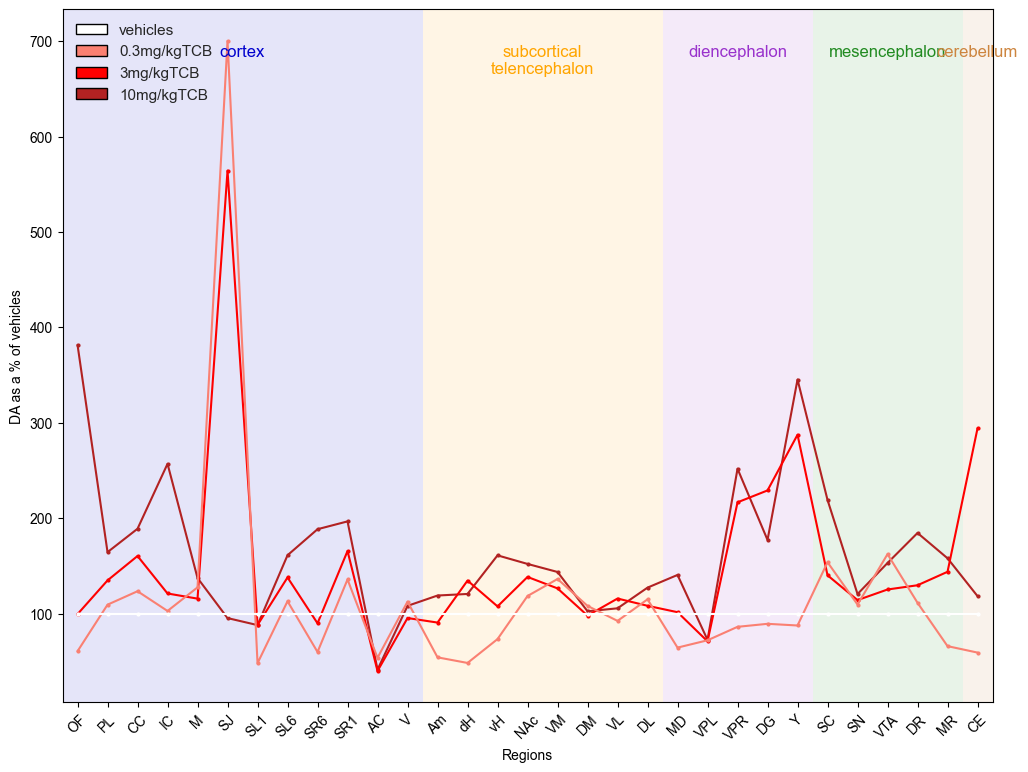

In [3]:
#CHOSE ALL OUTLIERS IN LOOP - REMI (ratios only compound_ratio_mapping)
percentageVehiclesFig(
        filename,
        experiment='dose_response',
        compound='DA',
        regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], #REMI i would ike this to work the same way it does for correlograms i.e. also specifying the order 
        from_scratch=True )


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Invalid characters in identifier, replacing with '_' 
PROCESSING 5HIAA/5HT IN OF FOR dose_response

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  37.538512  2.577968e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -0.5226  0.0000 -0.7014 -0.3438    True
1  0.3mg/kgTCB   3mg/kgTCB   -0.3628  0.0000 -0.5416 -0.1840    True
2  0.3mg/kgTCB    vehicles    0.0623  0.7958 -0.1205  0.2451   False
3   10mg/kgTCB   3mg/kgTCB    0.1598  0.0711 -0.0099  0.3294   False
4   10mg/kgTCB    vehicles    0.5849  0.0000  0.4111  0.7588    True
5    3mg/kgTCB    vehicles    0.4251  0.0000  0.2513  0.5990    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-0

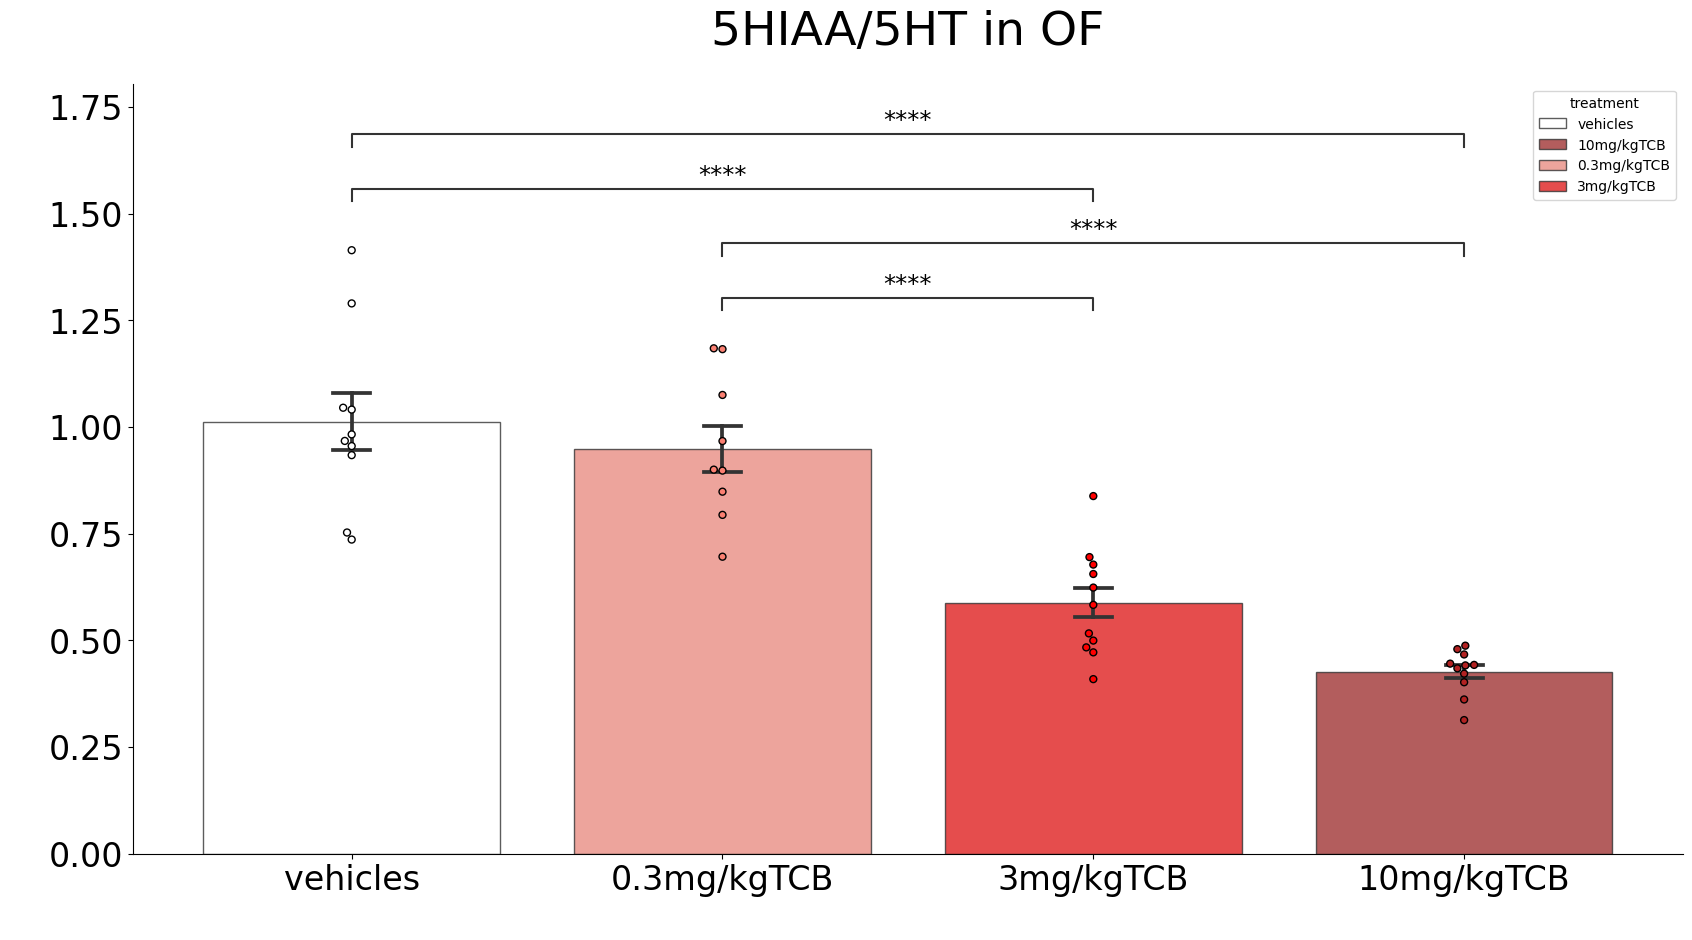

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_5HIAA_5HT_in_OF.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_OF.svg
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_OF.png


In [3]:
#QUANTITATIVE HISTOGRAMS

quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
    compound='5HIAA/5HT',
    region='OF',
    experiment= 'dose_response', 
    do_outliers=False, 
    from_scratch=True
)


# quantitativeHistogram( # JAS not working pls look into
#     filename,

#     experiment='agonist_antagonist',
#     compound='3MT/DA',
#     fregion='DL', 
#     outlier_test= 'grubbs', #this should not be asked every time it is something you would set once in the constants for this experiment, could do redo_outliers = T/F
#     #it forced me to do outliers as ther were not done 5HIAA/5HT in DL dont love this 
#     p_value_threshold=0.05, #again this should be a constant for the experiment 
#     from_scratch=True,
# )

# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


Invalid characters in identifier, replacing with '_' 
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_compound_GLU_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/agonist_antagonist_compound_GLU_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/agonist_antagonist_compound_GLU_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.png


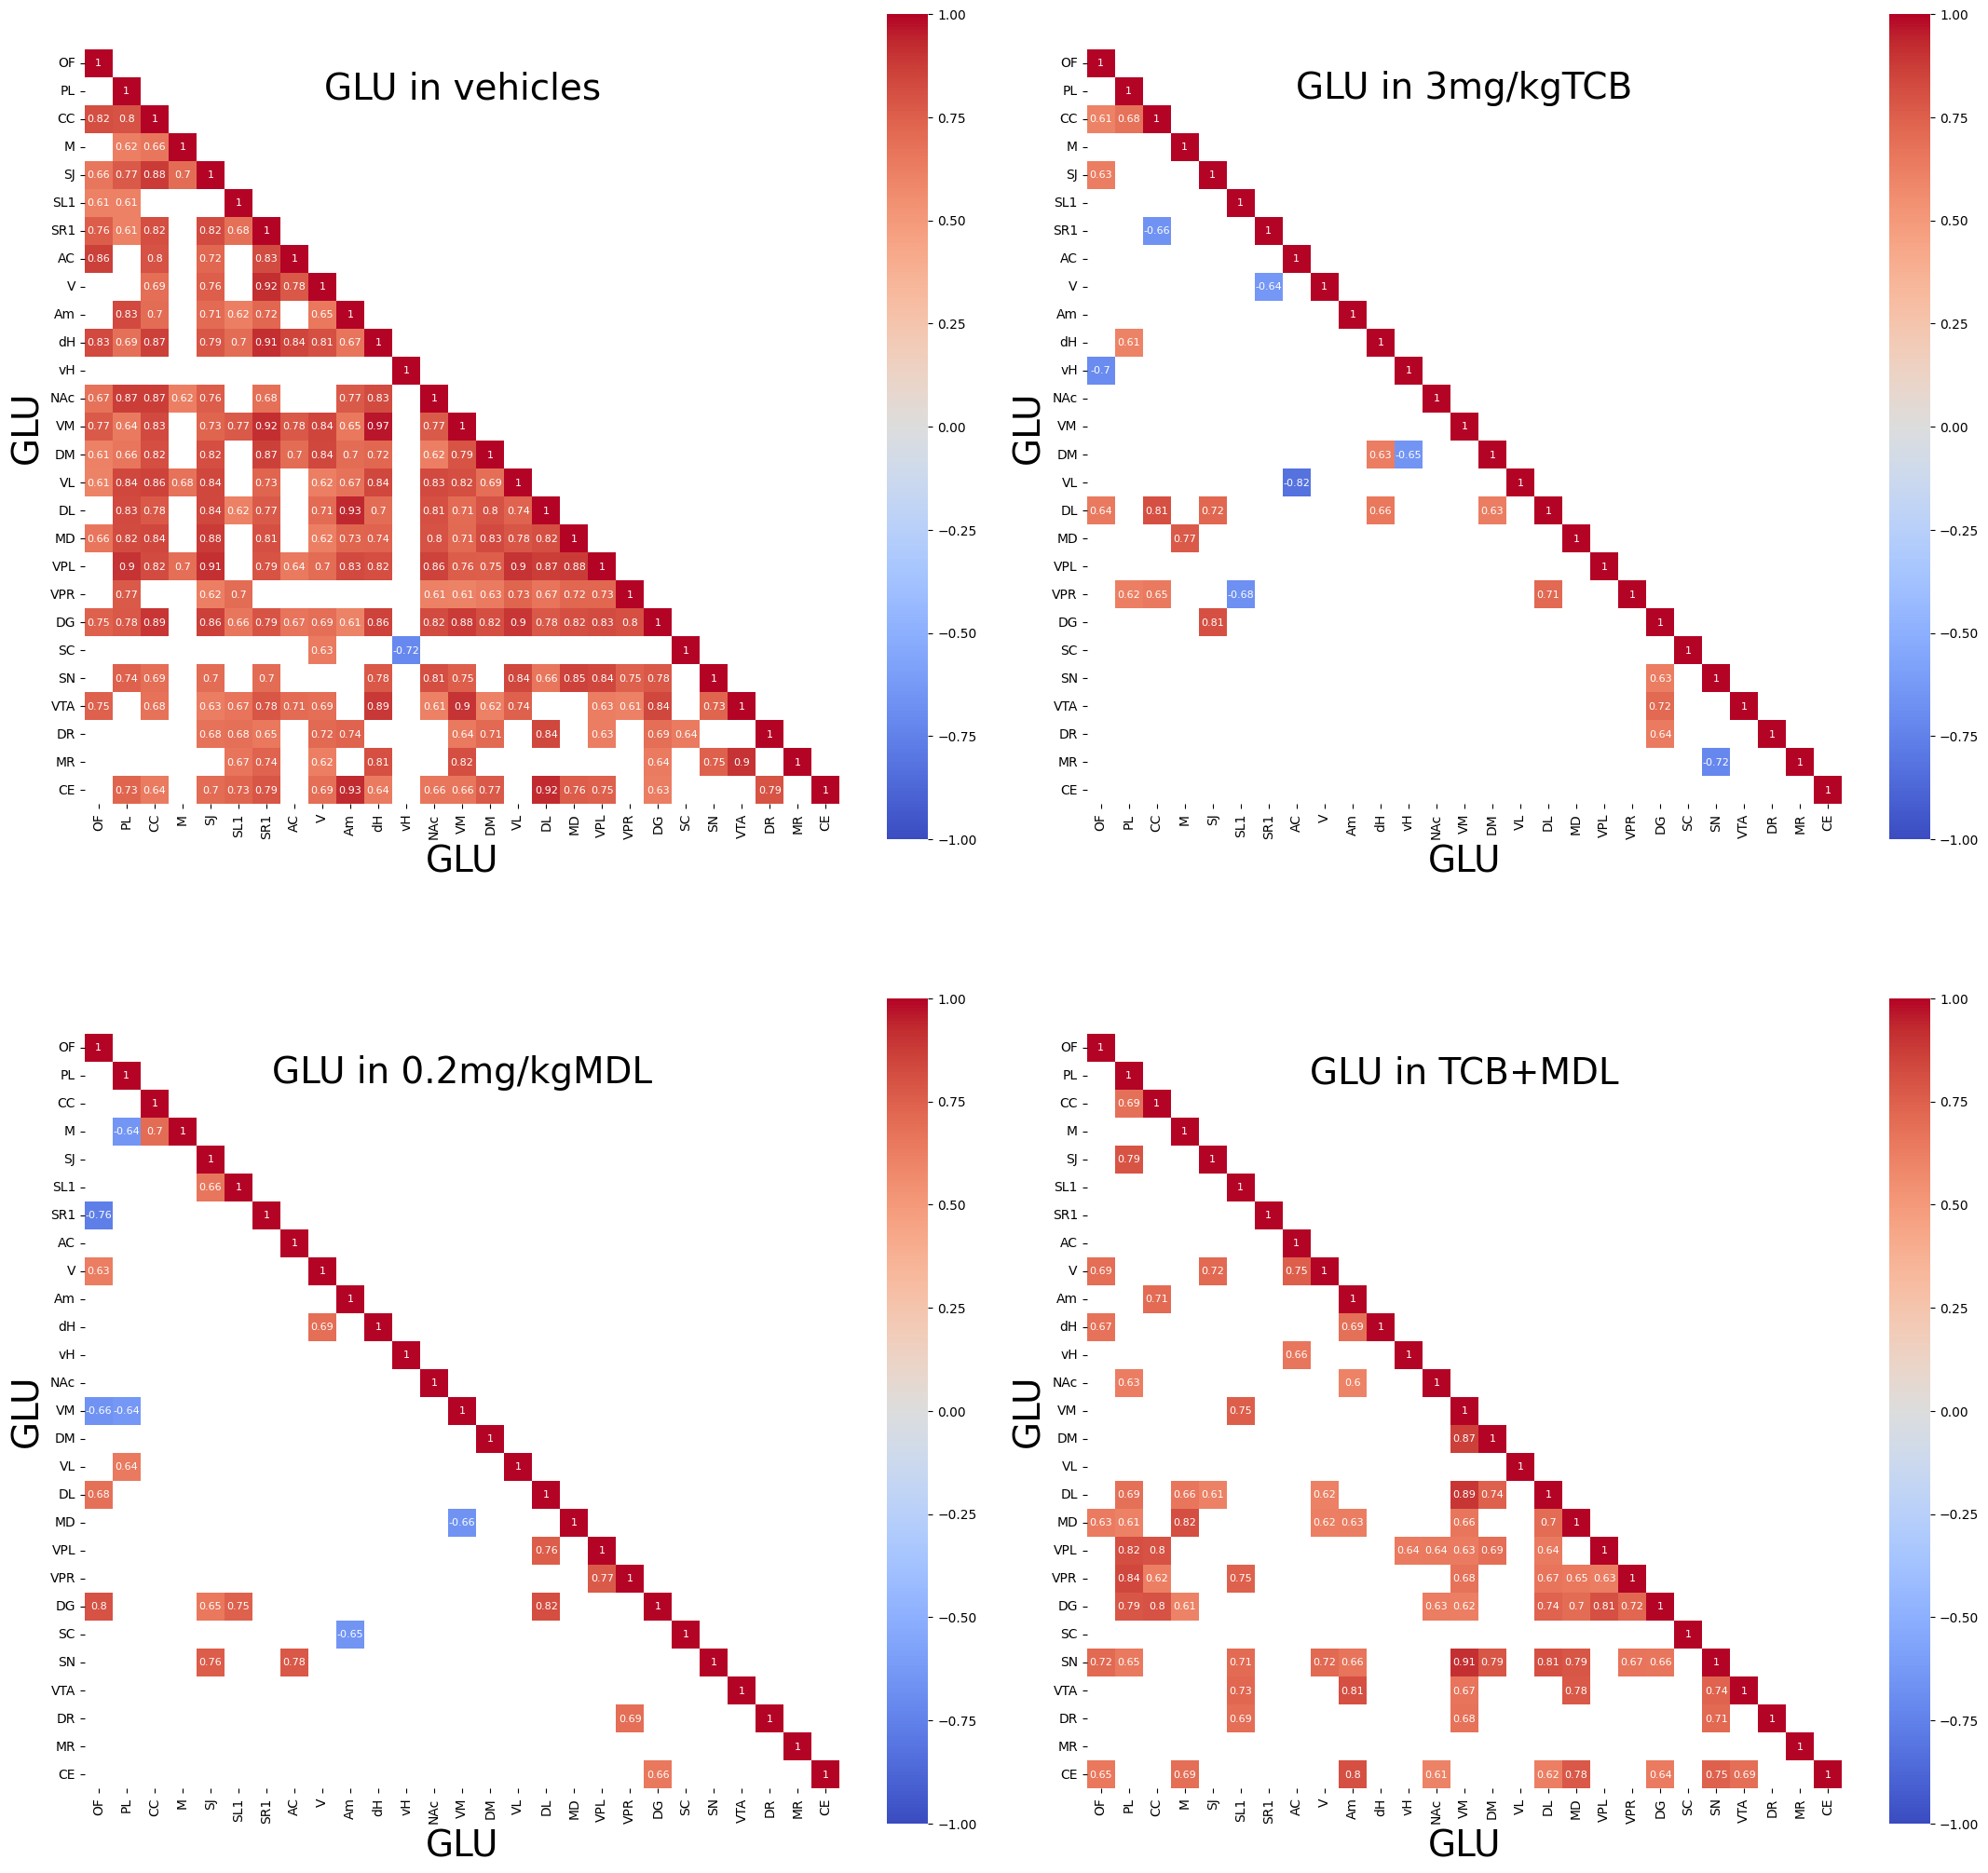

In [3]:
#CORRELOGRAMS

# correlogram(filename, p_value_threshold=0.05) #with prompts

#copy bellow 
# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE


correlogram(filename, 
            experiment='agonist_antagonist', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='GLU', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            )

RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  44.361039  2.500850e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB    2.4500  0.0002  1.0825  3.8175    True
1  0.3mg/kgTCB   3mg/kgTCB    4.5636  0.0000  3.3040  5.8233    True
2  0.3mg/kgTCB    vehicles   -0.4667  0.8298 -1.9554  1.0221   False
3   10mg/kgTCB   3mg/kgTCB    2.1136  0.0009  0.7740  3.4532    True
4   10mg/kgTCB    vehicles   -2.9167  0.0001 -4.4737 -1.3597    True
5    3mg/kgTCB    vehicles   -5.0303  0.0000 -6.4935 -3.5671    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HT" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HT/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***:

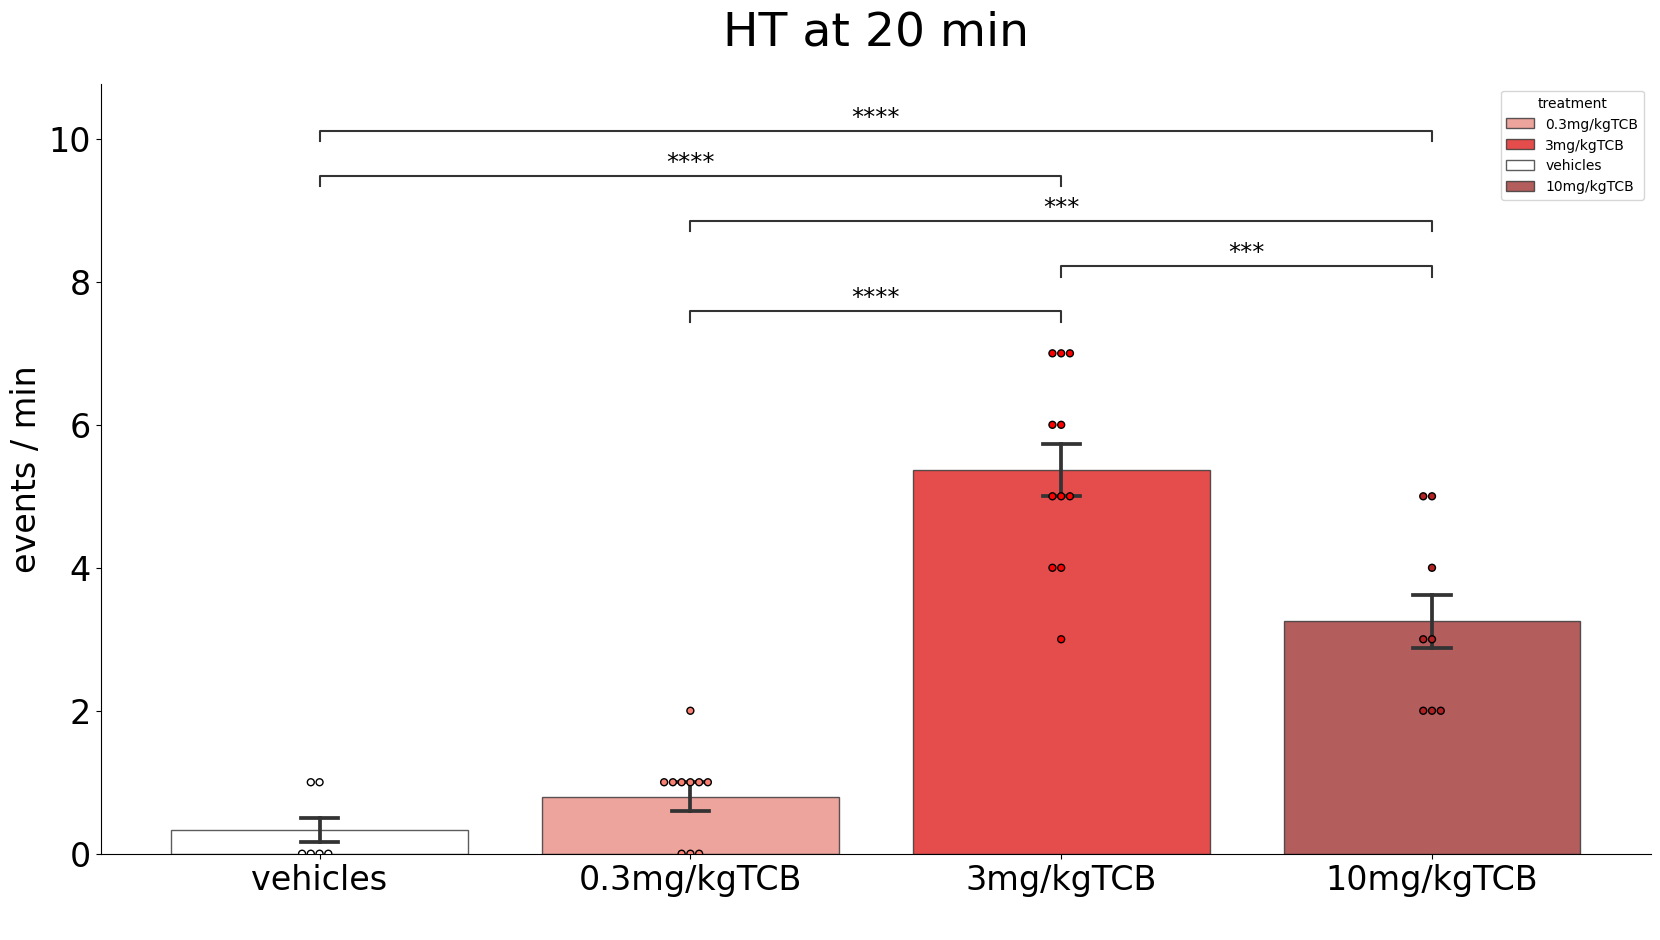

In [4]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers, prompts and building multiple at once
headTwitchHistogram(
    HT_filename,
    experiment='dose_response',
    vairable='HT_20',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)

# subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


In [4]:
#SUBSELECT RAW DATA

# subselectDf(getCompoundAndRatiosDf(filename), {"treatment": "3mg/kgTCB", "compound": "3MT", "region":["SJ", "dH"]})

subselectDf(getCompoundAndRatiosDf(filename), { "compound": "5HIAA/5HT", "region":["Y", "SC", "M", "MR"], 'experiment':'dose_response'})
#second pram is a dict of colname and subgroup to select


,mouse_id,group_id,value,compound,region,treatment,color,experiment,grubbs_outlier,eliminated_grubbs_outlier
156056,2,1,0.287632,5HIAA/5HT,M,vehicles,white,dose_response,False,False
157114,5,1,0.212173,5HIAA/5HT,M,vehicles,white,dose_response,False,False
158172,7,1,0.236728,5HIAA/5HT,M,vehicles,white,dose_response,False,False
159230,8,4,0.049405,5HIAA/5HT,M,10mg/kgTCB,firebrick,dose_response,True,False
159759,9,1,0.137207,5HIAA/5HT,M,vehicles,white,dose_response,False,False
...,...,...,...,...,...,...,...,...,...,...
1197966,64,4,0.408526,5HIAA/5HT,Y,10mg/kgTCB,firebrick,dose_response,False,False
1198015,65,2,2.098837,5HIAA/5HT,Y,0.3mg/kgTCB,salmon,dose_response,False,False
1198113,67,1,1.244830,5HIAA/5HT,Y,vehicles,white,dose_response,False,False
1198211,68,4,0.478760,5HIAA/5HT,Y,10mg/kgTCB,firebrick,dose_response,False,False


In [10]:
#GET AGGERGATED STATS DF
subselectDf(getAggregateStatsDf(filename), {"treatment": "vehicles", "experiment": "dose_response", "region":["SR1", "V"], "compound":"GLU"})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


,treatment,region,compound,experiment,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
102729,vehicles,SR1,GLU,dose_response,0.912970,0.264357,True,637.339188,216.532114,65.286889,"[235.746186, 318.7504687, 651.7335814, 724.817..."
104561,vehicles,V,GLU,dose_response,0.965948,0.842957,True,896.767045,457.202501,137.851741,"[178.7621117, 275.818618, 999.8386236, 1101.17..."


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


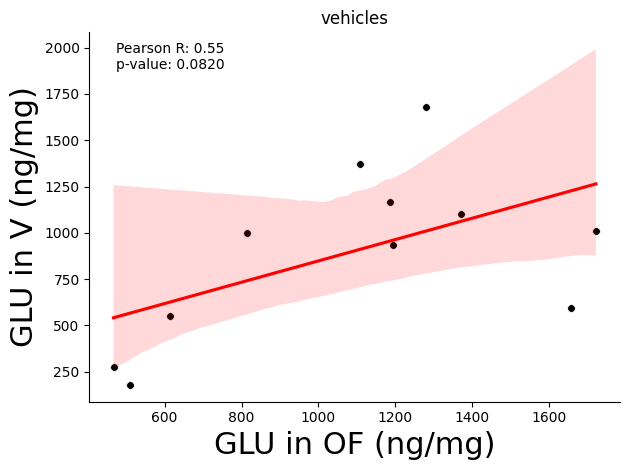

In [5]:
#show a single correlation #JJB make a funciton pls babe
#CONSTRUCTION
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#REMI / JAS w coffee this needs to be adjusted so its flexible between compounds between regions ect.... I was thinking a dict entry?
# line plot to show what a correlation is 
compound= 'GLU'
regions=['V', 'OF'] # y , x
treatment='vehicles'

df = subselectDf(getAggregateStatsDf(filename), {"treatment": treatment, "experiment": "dose_response", "region":regions, "compound":compound})

x_data = df[df['region'] == regions[1]]['values'].values[0]
y_data = df[df['region'] == regions[0]]['values'].values[0]

x_label=f"{compound} in {regions[1]} (ng/mg)"
y_label=f"{compound} in {regions[0]} (ng/mg)"

pearson_r, p_value = stats.pearsonr(x_data, y_data)
color = 'red' if pearson_r > 0 else 'blue'

fig, ax  = plt.subplots()
sns.scatterplot(x=x_data, y=y_data, ax=ax, marker='o',  s=30, color='black') #edgecolor='black', facecolor='salmon', linewidth=1.3,
sns.regplot(x=x_data, y=y_data, ci=95, ax=ax, scatter=False, line_kws={"color": color}) #scatter_kws={"color": "black"}

ax.set_xlabel(x_label, fontsize=22)
ax.set_ylabel(y_label, fontsize=22)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(treatment)
#add corr values
labels = f'Pearson R: {pearson_r:.2f}\np-value: {p_value:.4f}'
ax.text(0.05, 0.9, labels, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.tight_layout()

In [ ]:
#PCA

In [ ]:
#GRAPH THEORY 
#https://networkx.org/documentation/latest/